<a href="https://colab.research.google.com/github/igormatheusdiniz/ri_lab_03/blob/master/ri_lab3_igor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

import nltk
nltk.download('rslp')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
url = 'https://raw.githubusercontent.com/Benardi/ri_lab_01/master/output/results.csv'

Utilizei a base de dados de Benardi, e por motivos de não precisar importar o .csv toda vez ao inicializar o colab, defini a url em meu lab.

In [0]:
dataframe = pd.read_csv(url)

# Tratamento dos dados

Diferente do lab anterior onde para obter os tokens, não utilizei o método tokenize do ntlk, para atender as especificações do lab atual, atualizei a forma que recupero os tokens do meu texto.

In [0]:
setences = ''.join(dataframe.text).lower()
regex = RegexpTokenizer(r'[A-zÀ-ú-]+')
word_tokens = regex.tokenize(setences)


#Questão 1

Abaixo tratei os meus tokens seguindo os critérios da seguinte maneira:

*   Todas as palavras minúsculas: Evitar transtornos de pesquisa entre carcateres maiusculos e minusculos 
*   Retirar stop-words: Os stop-words podem ser danosos a pesquisa. A retirada deles melhora o tempo de resposta e efetividade
*  Apostofre foram descartadas: No idioma "português não tem-se tanta influência da ocorrência do apóstrofe"
* Foram preservadas palavras com acentuação: Em alguns casos palavras acentuadas de maneiras diferentes refletem pesquisas diferentes.
* Também foram preservados tokens númericos: Algumas pesquisas por anos ou números expressivos a interesse do usuário podem ser importantes





In [0]:
list_aux = []
stopWords = set(stopwords.words('portuguese'))

for word in word_tokens:
  if len(word) >= 3 and word[0] != "[" and word[-1]!="]":
    if word not in stopWords:
      list_aux.append(word)
    
#lista de palavras tratadas, por motivos de estética na exibição do gitHub deixei a linha abaixo comentada    
#list_aux

# Questão 2

Para adicionar as colunas de rank(r), Probabilidade(Pr) e C(rPr), implementa-se o código abaixo.

In [254]:
totalWords = len(list_aux)
words = pd.DataFrame(list_aux, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')
word_counts['Pr'] =  (word_counts.freq / totalWords)*100
word_counts['rPr'] = (word_counts.r*word_counts.Pr)/100
print(totalWords)
word_counts

115729


,word,freq,r,Pr,rPr
0,anos,584,1.0,0.504627,0.005046
1,ser,504,2.0,0.435500,0.008710
2,sobre,426,3.0,0.368101,0.011043
3,bolsonaro,372,4.0,0.321441,0.012858
4,presidente,370,5.0,0.319712,0.015986
5,governo,352,6.0,0.304159,0.018250
6,país,339,7.0,0.292926,0.020505
7,ainda,337,8.0,0.291198,0.023296
8,brasil,332,9.0,0.286877,0.025819
9,ter,256,10.0,0.221206,0.022121


Selecionando as 50 palavras mais frequentes dentre todo o resultado temos a tabela abaixo.

In [255]:
word_counts.loc[0:50]

,word,freq,r,Pr,rPr
0,anos,584,1.0,0.504627,0.005046
1,ser,504,2.0,0.435500,0.008710
2,sobre,426,3.0,0.368101,0.011043
3,bolsonaro,372,4.0,0.321441,0.012858
4,presidente,370,5.0,0.319712,0.015986
5,governo,352,6.0,0.304159,0.018250
6,país,339,7.0,0.292926,0.020505
7,ainda,337,8.0,0.291198,0.023296
8,brasil,332,9.0,0.286877,0.025819
9,ter,256,10.0,0.221206,0.022121


# Questão 3


## Aplicando os stemms aos tokens:
Temos abaixo duas estruturas auxiliares, a primeira (stemms_words), será utlizada para armazenar os prefixos das palavras, enquanto que a outra estrutura serve de auxilio para facilitar o encontro de falsos positivos e falsos negativos.

stemms_tible é uma tabela criada para facilitar a recuperação de informação e exibição das palavras e seus respectivos prefixos.

In [0]:
stemms_words = []
stemms =[]

ps = nltk.stem.RSLPStemmer()

for word in list_aux:
  stemms_words.append(ps.stem(word))
  stemms.append(word+" "+ps.stem(word) )
  
stemms_tible = pd.DataFrame(list_aux, columns=['word'])
stemms_tible['StemmingWord'] = stemms_words

#Estrutura paxa auxiliar na pesquisa de faltos positivos e falsos negativos
#Por motivos de estética na exibição do gitHub deixei a linha abaixo comentada    
#stemms



## Falsos Positivos: São palavras que possuem o mesmo radical mas deveriam estar em radicais diferentes devido ao seu próprio contexto.

###Estavam vs. Estados
Podemos recuperar na nossa tabela os valores "estavam" e "estados", como podemos ver abaixo. Essas palavras deveriam estar em radicais diferentes uma vez que não se co-relacionam em seus contextos.

In [257]:
stemms_tible[(stemms_tible['word'] == "estavam") | (stemms_tible['word'] == "estados")]

,word,StemmingWord
3969,estados,est
4103,estados,est
9548,estados,est
12869,estados,est
12982,estados,est
13029,estados,est
16183,estados,est
16245,estados,est
16277,estados,est
16286,estados,est


### Parir vs. Parar

In [258]:
stemms_tible[(stemms_tible['word'] == "parir") | (stemms_tible['word'] == "parar")]

,word,StemmingWord
33689,parar,par
43744,parar,par
65208,parar,par
70208,parir,par
80169,parar,par
83758,parar,par
86850,parar,par
98202,parar,par
98840,parar,par
102738,parar,par


### Comida vs. Comando

In [259]:
stemms_tible[(stemms_tible['word'] == "comida") | (stemms_tible['word'] == "comando")]

,word,StemmingWord
2667,comando,com
13842,comida,com
13924,comida,com
13967,comida,com
16650,comando,com
22306,comando,com
27249,comida,com
27319,comando,com
27413,comida,com
27692,comida,com


### Lideram vs. Lidia

In [260]:
stemms_tible[(stemms_tible['word'] == "lideram") | (stemms_tible['word'] == "lidia")]

,word,StemmingWord
45521,lidia,lid
45562,lidia,lid
45668,lidia,lid
45757,lidia,lid
45970,lidia,lid
46060,lidia,lid
46081,lidia,lid
57821,lideram,lid


### Mensagem vs. Mensal

In [261]:
stemms_tible[(stemms_tible['word'] == "mensagem") | (stemms_tible['word'] == "mensal")]

,word,StemmingWord
124,mensagem,mens
1699,mensagem,mens
5074,mensagem,mens
6433,mensagem,mens
6465,mensagem,mens
6561,mensagem,mens
6606,mensagem,mens
6687,mensagem,mens
8195,mensagem,mens
8228,mensagem,mens


## Falsos negativos:  São palavras que deveriam ter sido reduzidas pro mesmo mas estao em radicais diferentes

### Aborto vs. Abortá-la

In [262]:
stemms_tible[(stemms_tible['word'] == "aborto") | (stemms_tible['word'] == "abortá-la")]

,word,StemmingWord
9587,aborto,abort
15676,aborto,abort
23917,aborto,abort
61775,aborto,abort
61777,aborto,abort
61822,aborto,abort
61874,aborto,abort
62013,aborto,abort
62075,aborto,abort
70456,aborto,abort


### Abrigo vs. Abrigou-se

In [263]:
stemms_tible[(stemms_tible['word'] == "abrigo") | (stemms_tible['word'] == "abrigou-se")]

,word,StemmingWord
2482,abrigo,abrig
27288,abrigo,abrig
31120,abrigou-se,abrigou-s
38784,abrigo,abrig
115585,abrigo,abrig


### Abstendo vs. Abstenções

In [264]:
stemms_tible[(stemms_tible['word'] == "abstendo") | (stemms_tible['word'] == "abstenções")]

,word,StemmingWord
33344,abstendo,abst
82352,abstenções,abstenç


### Academia vs. Academicamente

In [265]:
stemms_tible[(stemms_tible['word'] == "academia") | (stemms_tible['word'] == "academicamente")]

,word,StemmingWord
5661,academia,academ
11200,academia,academ
24823,academia,academ
46749,academicamente,academic
48292,academia,academ
56812,academia,academ
80266,academia,academ
110988,academia,academ


### Acessível vs. Acessibilidade

In [266]:
stemms_tible[(stemms_tible['word'] == "acessível") | (stemms_tible['word'] == "acessibilidade")]

,word,StemmingWord
10188,acessível,acess
28571,acessível,acess
36066,acessibilidade,acessibil
45537,acessível,acess


Tendo mente a definição de "falsos positivos" citadas anteriormente neste documento,  em uma pesquisa com falsos positivos muito provavelmente não satisfará o desejo do usuário, por exemplo: um usuário procurando por "marketing" não será satisfeito pela maioria dos documentos que mencionam "mercados", mas não "marketing". Já os falsos negativos podem chegar a nem fornecer os resultados esperados pelo usuário, uma vez que a pesquisa desejada por estar direcionad a outro radical não esperado pelo usuário. 


#Questão 4

## Stemms isolados

In [0]:
%matplotlib inline

In [0]:
#CONTANDO A FREQUENCIA DOS STEMMS

stemmWords = pd.DataFrame(stemms_words, columns=['stemm'])
stemm_counts = stemms_tible.StemmingWord.value_counts().reset_index()
stemm_counts.columns = ['stemm', 'freq']

In [269]:
totalStemmWords = len(stemms_words)
stemm_counts['r'] = stemm_counts.freq.rank(ascending=False, method='first')
stemm_counts['Pr'] =  (stemm_counts.freq / totalStemmWords)*100
stemm_counts['rPr'] = (stemm_counts.r*word_counts.Pr)/100
print(totalStemmWords)
stemm_counts


115729


,stemm,freq,r,Pr,rPr
0,ano,796,1.0,0.687814,0.005046
1,pod,636,2.0,0.549560,0.008710
2,brasil,596,3.0,0.514996,0.011043
3,ser,540,4.0,0.466607,0.012858
4,outr,534,5.0,0.461423,0.015986
5,part,497,6.0,0.429452,0.018250
6,tod,494,7.0,0.426859,0.020505
7,país,457,8.0,0.394888,0.023296
8,presid,457,9.0,0.394888,0.025819
9,govern,447,10.0,0.386247,0.022121


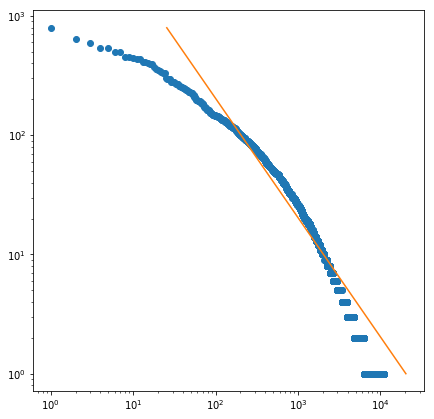

In [270]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(stemm_counts["r"], 
         stemm_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
stemm_counts['pred'] = np.median(stemm_counts.rPr) / (stemm_counts.Pr/100)

plt.plot(stemm_counts["pred"],
         stemm_counts["freq"],
         linestyle='-',
         marker='')

###Discussão do resultado obtido em comparação aos tokens sem stemming:

Percebe-se uma diferença para os ranks mais baixos e ranks mais altos. Isso ocorre porque com o processo de stemmização das palavras o número do vocabulario diminui, alguns radicais se repetem várias vezes para certas palavras que possuem o mesmo radical. 

A frequências ficaram um pouco mais igualitárias em comparação ao gráfico das palvras sem stemming. Palavras sem stemming podem ser muito diferentes entre si, e as palavras stemmizadas, são palravas iguais para o mesmo radical. 

A ideia principal é: "erra nos rankings baixos. Devido ao uso de stemming, aumentou a frequencia dos algumas palavras e diminuiu de outras que antes estavam muito grande, isso ocorre porque houve uma redução da palavra ao radical,  e alguns radicais de palavras que antes não tinham uma frequência muito grande, agora podem aparecer com maior frequência."

## Bigramas de Stemms

In [0]:
#GERANDO OS BIGRAMAS

bigram = nltk.bigrams(stemms_words)
list_bigram_aux = []
bigram_aux = ''

final_bigram = list(bigram)
for item in final_bigram:
  bigram_aux = item[0]+' '+item[1]
  list_bigram_aux.append(bigram_aux)

#lista dos bigramas de radicais, por motivos de estética na exibição do gitHub deixei a linha abaixo comentada    
#list_bigram_aux

In [272]:
#CONTANDO A FREQUENCIA DOS BIGRAMAS

bigramWords = pd.DataFrame(list_bigram_aux, columns=['bigram'])
bigram_counts = bigramWords.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']


bigram_counts

,bigram,freq
0,pod ser,107
1,dev ser,77
2,red soc,60
3,est unid,59
4,ano pass,57
5,além diss,53
6,milhã real,48
7,bilhã real,46
8,forç arm,41
9,rio jan,38


In [0]:
#PROBABILIDADE E C DOS BIGRAMAS
total_bigram_words = len(list_bigram_aux)
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')
bigram_counts['Pr'] =  (bigram_counts.freq / total_bigram_words)*100
bigram_counts['rPr'] = (bigram_counts.r*word_counts.Pr)/100

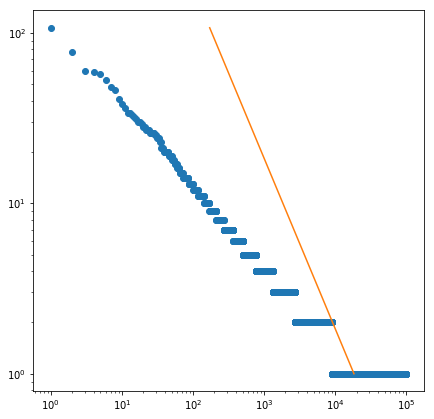

In [274]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], 
         bigram_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
bigram_counts['pred'] = np.mean(bigram_counts.rPr) / (bigram_counts.Pr/100)

plt.plot(bigram_counts["pred"],
         bigram_counts["freq"],
         linestyle='-',
         marker='')

### Discussão do resultado obtido em comparação aos bigramas sem stemming

Pode-se dizer que temos um algortimo bem ineficiente dentro de suas próprias limitações. É muito improvável de um bigrama de radicais ocorrer muitas vezes, uma vez que as palavras consecutivas com radicais A e B devem possuir outras ocorrências dentro do bigramas com a mesma combinação de radicais. 